# CS 316 : Introduction to Deep Learning - Fall 2024
## Lab 05 : Loss Functions
### Dr. Abdul Samad

# Instructions

1. Make a copy of this notebook on google colab at start of the lab.

2. Please rename your notebook as *Lab_6_aa1234.ipynb* before starting the lab. Notebooks which do not follow appropriate naming convention will not be graded.

3. You have to submit this lab during the lab timings. You are allowed to submit till 11:59 PM on the day of your lab with a 30% penalty. No submissions will be accepted afterwards.

4. Use of AI is strictly prohibited. Anyone caught using Any AI tool during lab or while grading will be immediately reported to OCVS without any further discussion.

5. At the end of the lab, download the notebook (ipynb extension file) and upload it on canvas as a file. Submitting link to notebook or any other file will not be accepted.

6. Each task has points assigned to it. Total Lab is of 100 points.

7. Use of for loops is strictly prohibited.

8. For every theoretical question, there is a separate cell given at the end. You have to write your answer there.

9. If you have any questions, please feel free to reach out to the course instructor or RA.

## Task Overview


We will continue with where we left in last lab. In this lab we will first explore MultiClass Entropy Loss. In Last lab we did Binary Class Entropy. And after that we will explore Gradient Descent. Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Let's start with importing Libraries first

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import math

In [35]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

# Define a shallow neural network
def shallow_nn(x, beta_0, omega_0, beta_1, omega_1):
    # Make sure that input data is (1 x n_data) array
    n_data = x.size
    x = np.reshape(x,(1,n_data))

    # This runs the network for ALL of the inputs, x at once so we can draw graph
    h1 = ReLU(np.matmul(beta_0,np.ones((1,n_data))) + np.matmul(omega_0,x))
    y = np.matmul(beta_1,np.ones((1,n_data))) + np.matmul(omega_1,h1)
    return y

# MultiClass Cross Entropy Loss

The neural network given above is same as the one you got in last lab. In Lab lab we did Binary Classfication which worked on 2 classes. In this lab we will be working on MultiClass.

In [36]:
# Get parameters for model -- we can call this function to easily reset them
def get_parameters():
  # And we'll create a network that approximately fits it
  beta_0 = np.zeros((3,1));  # formerly theta_x0
  omega_0 = np.zeros((3,1)); # formerly theta_x1
  beta_1 = np.zeros((3,1));  # NOTE -- there are three outputs now (one for each class, so three output biases)
  omega_1 = np.zeros((3,3)); # NOTE -- there are three outputs now (one for each class, so nine output weights, connecting 3 hidden units to 3 outputs)

  beta_0[0,0] = 0.3; beta_0[1,0] = -1.0; beta_0[2,0] = -0.5
  omega_0[0,0] = -1.0; omega_0[1,0] = 1.8; omega_0[2,0] = 0.65
  beta_1[0,0] = 2.0; beta_1[1,0] = -2; beta_1[2,0] = 0.0
  omega_1[0,0] = -24.0; omega_1[0,1] = -8.0; omega_1[0,2] = 50.0
  omega_1[1,0] = -2.0; omega_1[1,1] = 8.0; omega_1[1,2] = -30.0
  omega_1[2,0] = 16.0; omega_1[2,1] = -8.0; omega_1[2,2] =-8

  return beta_0, omega_0, beta_1, omega_1

In [37]:
# Utility function for plotting data
def plot_multiclass_classification(x_model, out_model, lambda_model, x_data = None, y_data = None, title= None):
  # Make sure model data are 1D arrays
  n_data = len(x_model)
  n_class = 3
  x_model = np.squeeze(x_model)
  out_model = np.reshape(out_model, (n_class,n_data))
  lambda_model = np.reshape(lambda_model, (n_class,n_data))

  fig, ax = plt.subplots(1,2)
  fig.set_size_inches(7.0, 3.5)
  fig.tight_layout(pad=3.0)
  ax[0].plot(x_model,out_model[0,:],'r-')
  ax[0].plot(x_model,out_model[1,:],'g-')
  ax[0].plot(x_model,out_model[2,:],'b-')
  ax[0].set_xlabel('Input, $x$'); ax[0].set_ylabel('Model outputs')
  ax[0].set_xlim([0,1]);ax[0].set_ylim([-4,4])
  if title is not None:
    ax[0].set_title(title)
  ax[1].plot(x_model,lambda_model[0,:],'r-')
  ax[1].plot(x_model,lambda_model[1,:],'g-')
  ax[1].plot(x_model,lambda_model[2,:],'b-')
  ax[1].set_xlabel('Input, $x$'); ax[1].set_ylabel('$\lambda$ or Pr(y=k|x)')
  ax[1].set_xlim([0,1]);ax[1].set_ylim([-0.1,1.05])
  if title is not None:
    ax[1].set_title(title)
  if x_data is not None:
    for i in range(len(x_data)):
      if y_data[i] ==0:
        ax[1].plot(x_data[i],-0.05, 'r.')
      if y_data[i] ==1:
        ax[1].plot(x_data[i],-0.05, 'g.')
      if y_data[i] ==2:
        ax[1].plot(x_data[i],-0.05, 'b.')
  plt.show()

# Multiclass classification

For multiclass classification, the network must predict the probability of $K$ classes, using $K$ outputs.  However, these probability must be non-negative and sum to one, and the network outputs can take arbitrary values.  Hence, we pass the outputs through a softmax function which maps $K$ arbitrary values to $K$ non-negative values that sum to one.

# Q1: Task [15 Points]

Write Softmax function that maps a vector of arbitrary values to a vector of values that are positive and sum to one.


<center>

![Google Drive Image](https://drive.google.com/uc?export=view&id=1oZAyXKTU5Em8MTyGaAnrkPKlXSl86iJw)

</center>

In [38]:
# Code the equation given in image above
def softmax(model_out):
  return np.exp(model_out)/np.sum(np.exp(model_out), axis = 0)

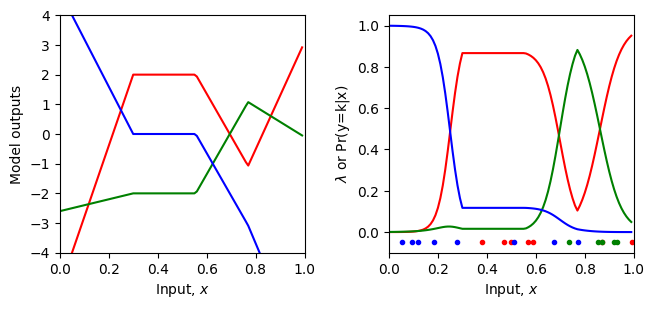

In [39]:
#Do Not Edit
#Use thiscode for testing

x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])
y_train = np.array([2,0,1,2,1,0,\
                    0,2,2,0,2,0,\
                    2,0,1,2,1,2, \
                    1,0])

# Get parameters for the model
beta_0, omega_0, beta_1, omega_1 = get_parameters()

# Define a range of input values
x_model = np.arange(0,1,0.01)
# Run the model to get values to plot and plot it.
model_out= shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
lambda_model = softmax(model_out)
plot_multiclass_classification(x_model, model_out, lambda_model, x_train, y_train)

The left is model output and the right is the model output after the softmax has been applied, so it now lies in the range [0,1] and represents the probability, that y=0 (red), 1 (green) and 2 (blue).  The dots at the bottom show the training data with the same color scheme.  So we want the red curve to be high where there are red dots, the green curve to be high where there are green dots, and the blue curve to be high where there are blue dots  We'll compute the likelihood and the negative log likelihood.

In [40]:
# Return probability under categorical distribution for observed class y
# Just take value from row k of lambda param where y =k,
def categorical_distribution(y, lambda_param):
    return np.array([lambda_param[row, i] for i, row in enumerate (y)])

In [41]:
# Let's double check we get the right answer before proceeding
print("Correct answer = %3.3f, Your answer = %3.3f"%(0.2,categorical_distribution(np.array([[0]]),np.array([[0.2],[0.5],[0.3]]))))
print("Correct answer = %3.3f, Your answer = %3.3f"%(0.5,categorical_distribution(np.array([[1]]),np.array([[0.2],[0.5],[0.3]]))))
print("Correct answer = %3.3f, Your answer = %3.3f"%(0.3,categorical_distribution(np.array([[2]]),np.array([[0.2],[0.5],[0.3]]))))

Correct answer = 0.200, Your answer = 0.200
Correct answer = 0.500, Your answer = 0.500
Correct answer = 0.300, Your answer = 0.300


<ipython-input-41-6783d68d7ce7>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Correct answer = %3.3f, Your answer = %3.3f"%(0.2,categorical_distribution(np.array([[0]]),np.array([[0.2],[0.5],[0.3]]))))
<ipython-input-41-6783d68d7ce7>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Correct answer = %3.3f, Your answer = %3.3f"%(0.5,categorical_distribution(np.array([[1]]),np.array([[0.2],[0.5],[0.3]]))))
<ipython-input-41-6783d68d7ce7>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this op

# Q2: Task [10 Points]

Code likelihood and negative log likelihood the same way you did earlier. Only change is the distribution.

In [42]:
def compute_likelihood(y_train, lambda_param):
  return np.prod(categorical_distribution(y_train, lambda_param))

def compute_negative_log_likelihood(y_train, lambda_param):
  return -1 * np.sum(np.log(categorical_distribution(y_train, lambda_param)))

In [43]:
#Do not Edit
#Use this code for testing
beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Use our neural network to predict the parameters of the categorical distribution
model_out = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
# Pass the outputs through the softmax function
lambda_train = softmax(model_out)
# Compute the negative log likelihood
nll = compute_negative_log_likelihood(y_train, lambda_train)
# Let's double check we get the right answer before proceeding
print("Correct answer = %9.9f, Your answer = %9.9f"%(17.015457867,nll))
# Let's test this
beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Use our neural network to predict the parameters of the categorical distribution
model_out = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
lambda_train = softmax(model_out)
# Compute the likelihood
likelihood = compute_likelihood(y_train, lambda_train)
# Let's double check we get the right answer before proceeding
print("Correct answer = %9.9f, Your answer = %9.9f"%(0.000000041,likelihood))

Correct answer = 17.015457867, Your answer = 17.015457867
Correct answer = 0.000000041, Your answer = 0.000000041


Now let's investigate finding the maximum likelihood / minimum negative log likelihood solution.  For simplicity, we'll assume that all the parameters are fixed except one and look at how the likelihood and negative log likelihood change as we manipulate the last parameter.  We'll start with overall y_offset, $\beta_1$ (formerly $\phi_0$)

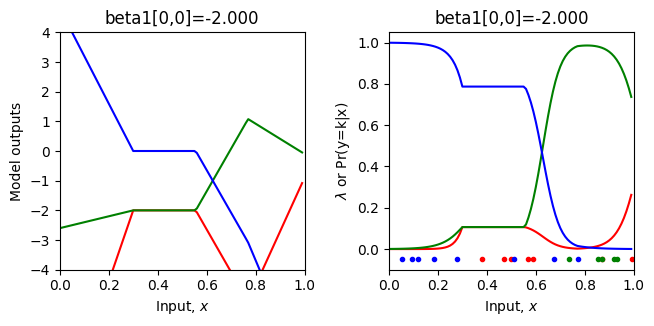

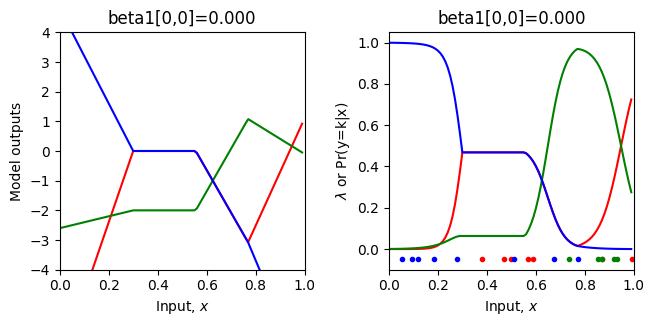

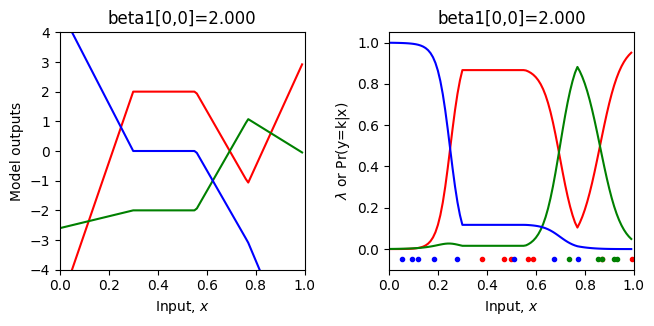

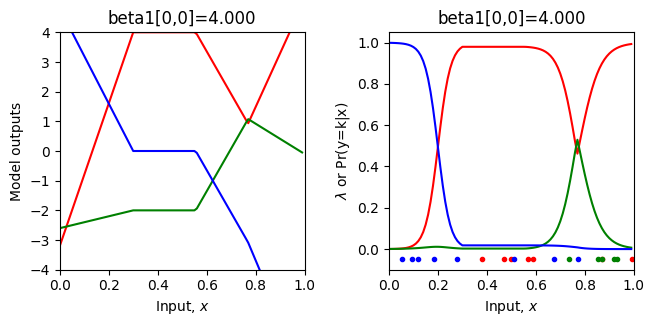

In [44]:
# Define a range of values for the parameter
beta_1_vals = np.arange(-2,6.0,0.1)
# Create some arrays to store the likelihoods, negative log likelihoods
likelihoods = np.zeros_like(beta_1_vals)
nlls = np.zeros_like(beta_1_vals)

# Initialise the parameters
beta_0, omega_0, beta_1, omega_1 = get_parameters()
for count in range(len(beta_1_vals)):
  # Set the value for the parameter
  beta_1[0,0] = beta_1_vals[count]
  # Run the network with new parameters
  model_out = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
  lambda_train = softmax(model_out)
  # Compute and store the two values
  likelihoods[count] = compute_likelihood(y_train,lambda_train)
  nlls[count] = compute_negative_log_likelihood(y_train, lambda_train)
  # Draw the model for every 20th parameter setting
  if count % 20 == 0:
    # Run the model to get values to plot and plot it.
    model_out = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
    lambda_model = softmax(model_out)
    plot_multiclass_classification(x_model, model_out, lambda_model, x_train, y_train, title="beta1[0,0]=%3.3f"%(beta_1[0,0]))



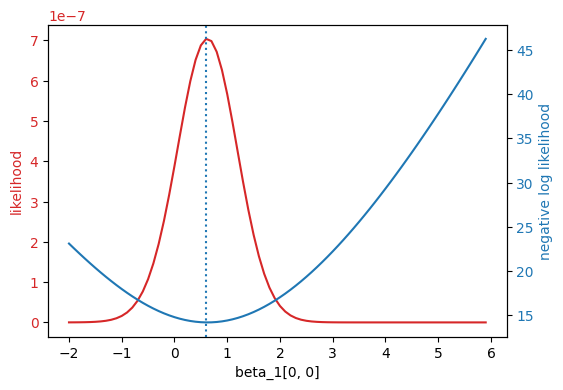

In [45]:
# Now let's plot the likelihood and negative log likelihood as a function of the value of the offset beta1
fig, ax = plt.subplots()
fig.tight_layout(pad=5.0)
likelihood_color = 'tab:red'
nll_color = 'tab:blue'


ax.set_xlabel('beta_1[0, 0]')
ax.set_ylabel('likelihood', color = likelihood_color)
ax.plot(beta_1_vals, likelihoods, color = likelihood_color)
ax.tick_params(axis='y', labelcolor=likelihood_color)

ax1 = ax.twinx()
ax1.plot(beta_1_vals, nlls, color = nll_color)
ax1.set_ylabel('negative log likelihood', color = nll_color)
ax1.tick_params(axis='y', labelcolor = nll_color)

plt.axvline(x = beta_1_vals[np.argmax(likelihoods)], linestyle='dotted')

plt.show()


Maximum likelihood = 0.000001, at beta_1=0.600
Minimum negative log likelihood = 14.166574, at beta_1=0.600


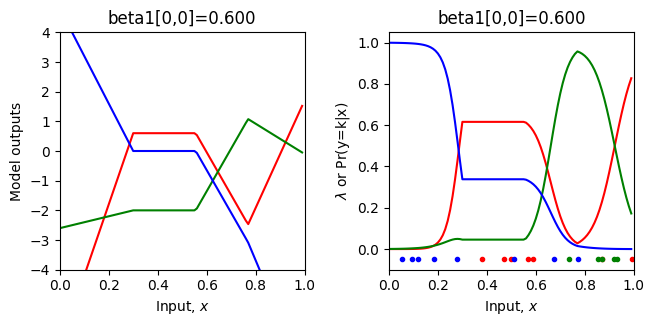

In [46]:
# Hopefully, you can see that the maximum of the likelihood fn is at the same position as the minimum negative log likelihood solution
# Let's check that:
print("Maximum likelihood = %f, at beta_1=%3.3f"%( (likelihoods[np.argmax(likelihoods)],beta_1_vals[np.argmax(likelihoods)])))
print("Minimum negative log likelihood = %f, at beta_1=%3.3f"%( (nlls[np.argmin(nlls)],beta_1_vals[np.argmin(nlls)])))

# Plot the best model
beta_1[0,0] = beta_1_vals[np.argmin(nlls)]
model_out = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
lambda_model = softmax(model_out)
plot_multiclass_classification(x_model, model_out, lambda_model, x_train, y_train, title="beta1[0,0]=%3.3f"%(beta_1[0,0]))

They both give the same answer. But you can see from the likelihood above that the likelihood is very small unless the parameters are almost correct.  So in practice, we would work with the negative log likelihood.<br><br>

Again, to fit the full neural model we would vary all of the 16 parameters of the network in the $\boldsymbol\beta_{0},\boldsymbol\Omega_{0},\boldsymbol\beta_{1},\boldsymbol\Omega_{1}$ until we find the combination that have the maximum likelihood / minimum negative log likelihood.<br><br>



# **Updating Parameters**
Whenever we have calculated the loss, we want to give feedback to our model about hyperparameters and update them. This involves 2 variables. Look at the equation given below.


<center>

![Google Drive Image](https://drive.google.com/uc?export=view&id=10NBbpJTuJ0IhkHyDClAzVVze7fsPX4F-)

</center>

Here, φ represents hyperparameters, α represents learning rate and $\frac{∂ L}{∂ ɸ}$ represents Gradient Descent. Let's try finding out α and $\frac{∂ L}{∂ ɸ}$ in this notebook.


# **Line search**




In [47]:
# Let's create a simple 1D function
def loss_function(phi):
  return 1- 0.5 * np.exp(-(phi-0.65)*(phi-0.65)/0.1) - 0.45 *np.exp(-(phi-0.35)*(phi-0.35)/0.02)

def draw_function(loss_function,a=None, b=None, c=None, d=None):
  # Plot the function
  phi_plot = np.arange(0,1,0.01);
  fig,ax = plt.subplots()
  ax.plot(phi_plot,loss_function(phi_plot),'r-')
  ax.set_xlim(0,1); ax.set_ylim(0,1)
  ax.set_xlabel(r'$\phi$'); ax.set_ylabel(r'$L[\phi]$')
  if a is not None and b is not None and c is not None and d is not None:
      plt.axvspan(a, d, facecolor='k', alpha=0.2)
      ax.plot([a,a],[0,1],'b-')
      ax.plot([b,b],[0,1],'b-')
      ax.plot([c,c],[0,1],'b-')
      ax.plot([d,d],[0,1],'b-')
  plt.show()


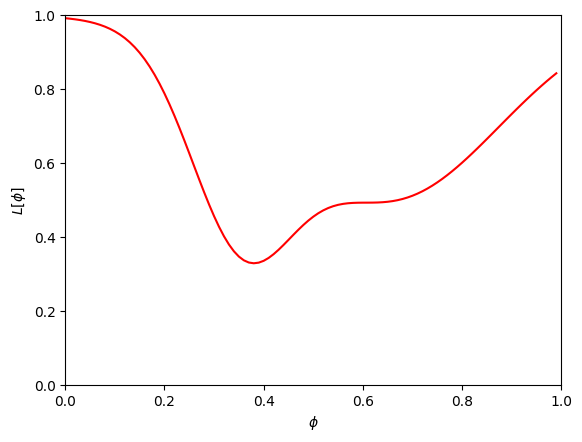

In [48]:
# Draw this function
draw_function(loss_function)

# Q3: Task [25 Points]

In this task we will create a line search procedure to find the minimum in the range 0,1.
There are multiple code segments which you will have to complete in this code. Whereever TODO is written in comments, you need to complete the that section till you find End Solution comment.


We will be implementing multiple rules in line search. Firstly, go throught the code block given below and then read these rules and implement them.

Rule 1:

If the HEIGHT at point A is less than the HEIGHT at points B, C, and D then halve the distance from A to points B, C, and D. i.e. bring them closer to the original point and a to all of them.

Rule 2:

If the HEIGHT at point b is less than the HEIGHT at point c then:

    point d becomes point c, and
    point b becomes 1/3 of a and new d which is then summed with a
    point c becomes 2/3 of a and new d which is then summed with a.

Rule 3:

If the HEIGHT at point c is less than the HEIGHT at point b then

    point a becomes point b, and
    point b becomes 1/3 of new a and d which is then summed with a
    point c becomes 2/3 of new a and d which is then summed with a.

Final Solution:

Update soln variable with final solution which is average of b and c.

In [49]:
def line_search(loss_function, thresh=.0001, max_iter = 10, draw_flag = False):

    # Initialize four points along the range we are going to search
    a = 0
    b = 0.33
    c = 0.66
    d = 1.0
    n_iter = 0

    # While we haven't found the minimum closely enough
    while np.abs(b-c) > thresh and n_iter < max_iter:
        # Increment iteration counter (just to prevent an infinite loop)
        n_iter = n_iter+1

        # Calculate all four points
        lossa = loss_function(a)
        lossb = loss_function(b)
        lossc = loss_function(c)
        lossd = loss_function(d)

        if draw_flag:
          draw_function(loss_function, a,b,c,d)

        print('Iter %d, a=%3.3f, b=%3.3f, c=%3.3f, d=%3.3f'%(n_iter, a,b,c,d))


        # TODO
        # Implement Rule 1 Here
        # Begin Solution
        if (lossa < lossb) and (lossa < lossc) and (lossa < lossd):
          b = a + (b - a) / 2
          c = a + (c - a) / 2
          d = a + (d - a) / 2

        # End Solution






        # TODO
        # Implement Rule 2 Here
        # Begin Solution
        if lossb < lossc:
          d = c
          b = a + (d - a) / 3
          c = a + 2 * (d - a) / 3
        # End Solution






        # TODO
        # Implement Rule 3 Here
        # Begin Solution
        a = b
        b = a + (d - a) / 3
        c = a + 2 * (d - a) / 3
        # End Solution






    # TODO
    # Final Solution
    # Begin Solution


    # End Solution


    return (b + c) / 2

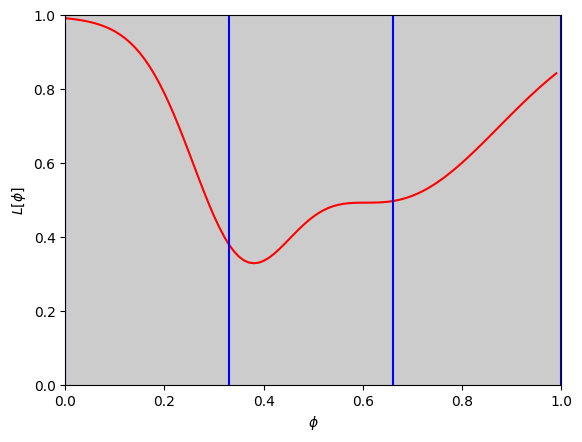

Iter 1, a=0.000, b=0.330, c=0.660, d=1.000


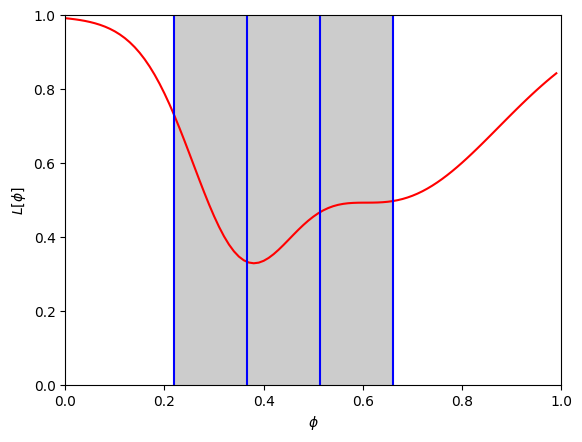

Iter 2, a=0.220, b=0.367, c=0.513, d=0.660


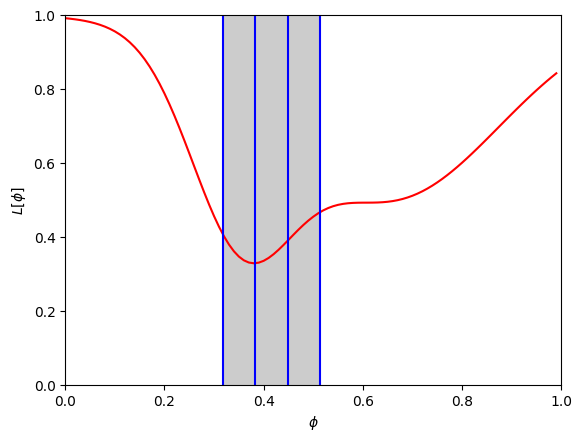

Iter 3, a=0.318, b=0.383, c=0.448, d=0.513


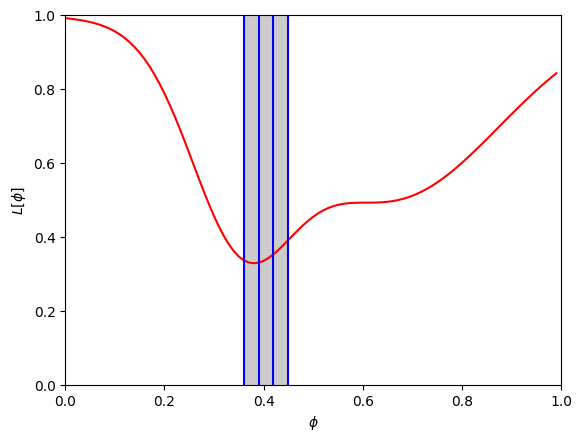

Iter 4, a=0.361, b=0.390, c=0.419, d=0.448


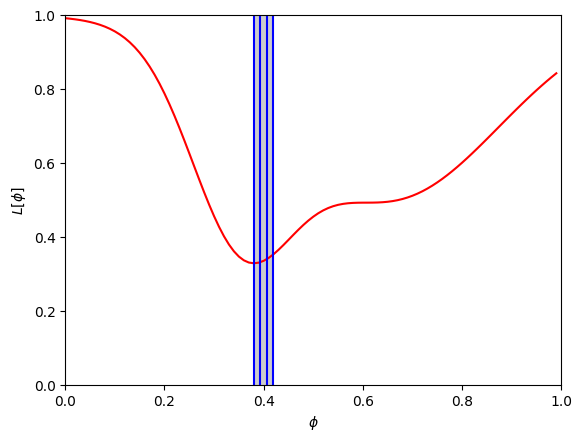

Iter 5, a=0.381, b=0.393, c=0.406, d=0.419


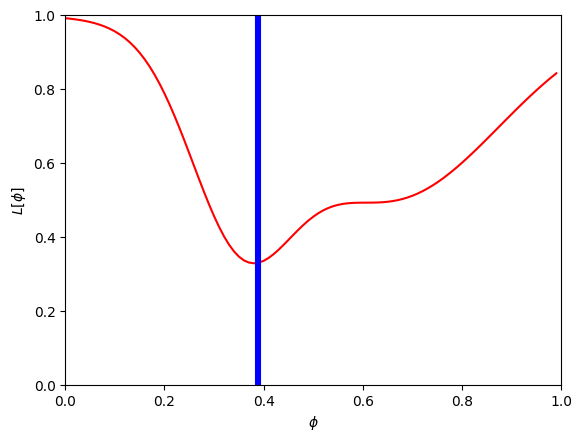

Iter 6, a=0.385, b=0.388, c=0.391, d=0.393


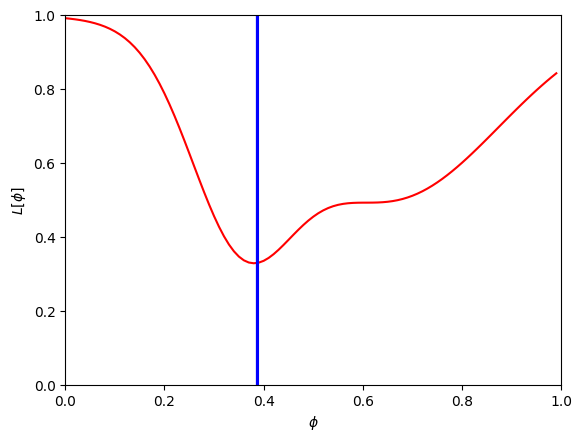

Iter 7, a=0.386, b=0.386, c=0.387, d=0.388


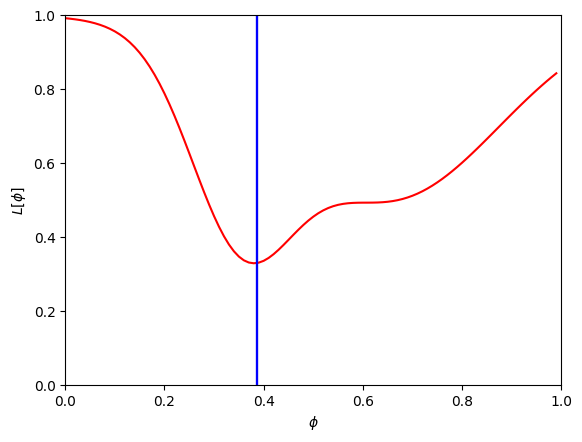

Iter 8, a=0.386, b=0.386, c=0.386, d=0.386
Soln = 0.386, loss = 0.329


In [50]:
soln = line_search(loss_function, draw_flag=True)
print('Soln = %3.3f, loss = %3.3f'%(soln,loss_function(soln)))

# **Gradient descent**




In [51]:
# Let's create our training data 12 pairs {x_i, y_i}
# We'll try to fit the straight line model to these data
data = np.array([[0.03,0.19,0.34,0.46,0.78,0.81,1.08,1.18,1.39,1.60,1.65,1.90],
                 [0.67,0.85,1.05,1.00,1.40,1.50,1.30,1.54,1.55,1.68,1.73,1.60]])

In [52]:
# Let's define our model -- just a straight line with intercept phi[0] and slope phi[1]
def model(phi,x):
  y_pred = phi[0]+phi[1] * x
  return y_pred

In [53]:
# Draw model
def draw_model(data,model,phi,title=None):
  x_model = np.arange(0,2,0.01)
  y_model = model(phi,x_model)

  fix, ax = plt.subplots()
  ax.plot(data[0,:],data[1,:],'bo')
  ax.plot(x_model,y_model,'m-')
  ax.set_xlim([0,2]);ax.set_ylim([0,2])
  ax.set_xlabel('x'); ax.set_ylabel('y')
  ax.set_aspect('equal')
  if title is not None:
    ax.set_title(title)
  plt.show()

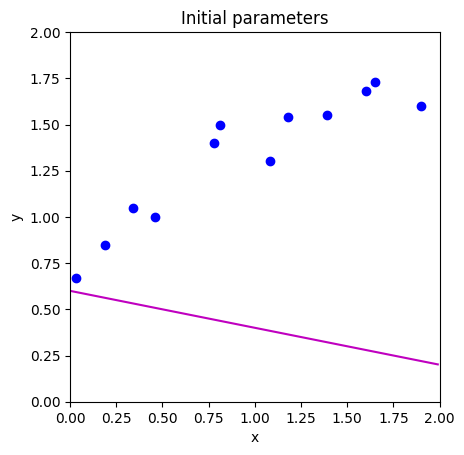

In [54]:
# Initialize the parameters to some arbitrary values and draw the model
phi = np.zeros((2,1))
phi[0] = 0.6      # Intercept
phi[1] = -0.2      # Slope
draw_model(data,model,phi, "Initial parameters")


Now let's compute the sum of squares loss for the training data

In [55]:
def compute_loss(data_x, data_y, model, phi):
  pred_y = model(phi,data_x)
  loss = np.sum(np.square(pred_y-data_y))

  return loss

Let's just test that we got that right

In [56]:
loss = compute_loss(data[0,:],data[1,:],model,np.array([[0.6],[-0.2]]))
print('Your loss = %3.3f, Correct loss = %3.3f'%(loss, 12.367))

Your loss = 12.367, Correct loss = 12.367


Now let's plot the whole loss function

In [57]:
def draw_loss_function(compute_loss, data,  model, phi_iters = None):
  # Define pretty colormap
  my_colormap_vals_hex =('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
  my_colormap_vals_dec = np.array([int(element,base=16) for element in my_colormap_vals_hex])
  r = np.floor(my_colormap_vals_dec/(256*256))
  g = np.floor((my_colormap_vals_dec - r *256 *256)/256)
  b = np.floor(my_colormap_vals_dec - r * 256 *256 - g * 256)
  my_colormap = ListedColormap(np.vstack((r,g,b)).transpose()/255.0)

  # Make grid of intercept/slope values to plot
  intercepts_mesh, slopes_mesh = np.meshgrid(np.arange(0.0,2.0,0.02), np.arange(-1.0,1.0,0.002))
  loss_mesh = np.zeros_like(slopes_mesh)
  # Compute loss for every set of parameters
  for idslope, slope in np.ndenumerate(slopes_mesh):
     loss_mesh[idslope] = compute_loss(data[0,:], data[1,:], model, np.array([[intercepts_mesh[idslope]], [slope]]))

  fig,ax = plt.subplots()
  fig.set_size_inches(8,8)
  ax.contourf(intercepts_mesh,slopes_mesh,loss_mesh,256,cmap=my_colormap)
  ax.contour(intercepts_mesh,slopes_mesh,loss_mesh,40,colors=['#80808080'])
  if phi_iters is not None:
    ax.plot(phi_iters[0,:], phi_iters[1,:],'go-')
  ax.set_ylim([1,-1])
  ax.set_xlabel('Intercept $\phi_{0}$'); ax.set_ylabel('Slope, $\phi_{1}$')
  plt.show()

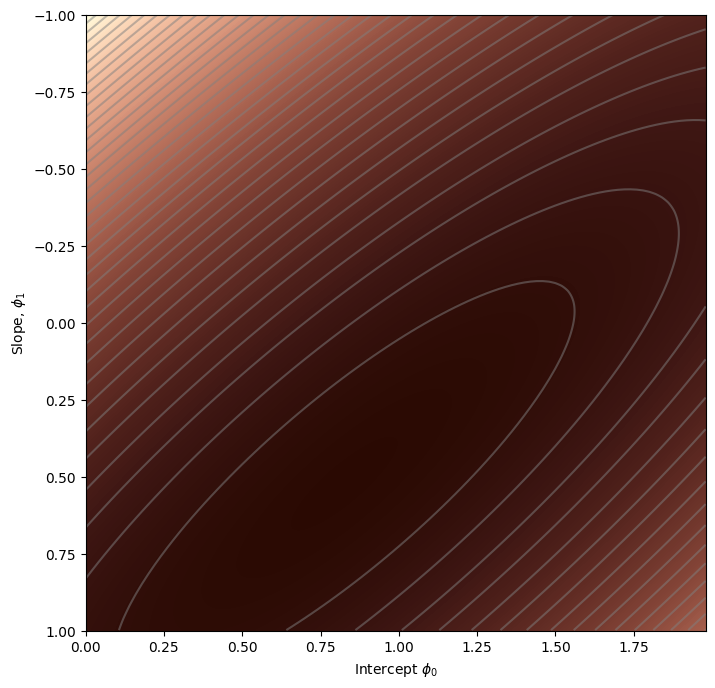

In [58]:
draw_loss_function(compute_loss, data, model)

# Q4: TODO [30 points]
Now let's compute the gradient vector for a given set of parameters:

\begin{equation}
\frac{\partial L}{\partial \boldsymbol\phi} = \begin{bmatrix}\frac{\partial L}{\partial \phi_0} \\\frac{\partial L}{\partial \phi_1} \end{bmatrix}.
\end{equation}

You have already seen sum of square loss expression. Use that to find out the expression for the derivative with respect to phi0 and phi1. You will have to submit picture of that derivative along with this notebook. Based on that write the code for calculating change in loss with respect to phi0 and change in loss with respect to phi1.


In [59]:
def compute_gradient(data_x, data_y, phi):
    # Begin Solution
    # End Solution
    return np.array([[np.sum(2 * (phi[0] + phi[1] * data_x - data_y))],[np.sum(2 * data_x * (phi[0] + phi[1] * data_x - data_y))]])

We can check we got this right using a trick known as **finite differences**.  If we evaluate the function and then change one of the parameters by a very small amount and normalize by that amount, we get an approximation to the gradient, so:

\begin{align}
\frac{\partial L}{\partial \phi_{0}}&\approx & \frac{L[\phi_0+\delta, \phi_1]-L[\phi_0, \phi_1]}{\delta}\\
\frac{\partial L}{\partial \phi_{1}}&\approx & \frac{L[\phi_0, \phi_1+\delta]-L[\phi_0, \phi_1]}{\delta}
\end{align}

We can't do this when there are many parameters;  for a million parameters, we would have to evaluate the loss function one million plus one times, and usually computing the gradients directly is much more efficient.

In [60]:
#Do Not Edit
#Use this code for testing
# Compute the gradient using your function
gradient = compute_gradient(data[0,:],data[1,:], phi)
print("Your gradients: (%3.3f,%3.3f)"%(gradient[0],gradient[1]))
# Approximate the gradients with finite differences
delta = 0.0001
dl_dphi0_est = (compute_loss(data[0,:],data[1,:],model,phi+np.array([[delta],[0]])) - \
                    compute_loss(data[0,:],data[1,:],model,phi))/delta
dl_dphi1_est = (compute_loss(data[0,:],data[1,:],model,phi+np.array([[0],[delta]])) - \
                    compute_loss(data[0,:],data[1,:],model,phi))/delta
print("Approx gradients: (%3.3f,%3.3f)"%(dl_dphi0_est,dl_dphi1_est))
# There might be small differences in the last significant figure because finite gradients is an approximation

assert np.abs(dl_dphi0_est-gradient[0]) < 0.002
assert np.abs(dl_dphi1_est-gradient[1]) < 0.002


Your gradients: (-21.904,-26.840)
Approx gradients: (-21.903,-26.839)


<ipython-input-60-0fb009249234>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Your gradients: (%3.3f,%3.3f)"%(gradient[0],gradient[1]))


Now we are ready to perform gradient descent.  We'll need to use our line search routine from notebook 6.1, which I've reproduced here plus the helper function loss_function_1D that maps the search along the negative gradient direction in 2D space to a 1D problem (distance along this direction)

In [61]:
def loss_function_1D(dist_prop, data, model, phi_start, search_direction):
  # Return the loss after moving this far
  return compute_loss(data[0,:], data[1,:], model, phi_start+ search_direction * dist_prop)

def line_search(data, model, phi, gradient, thresh=.00001, max_dist = 0.1, max_iter = 15, verbose=False):
    # Initialize four points along the range we are going to search
    a = 0
    b = 0.33 * max_dist
    c = 0.66 * max_dist
    d = 1.0 * max_dist
    n_iter = 0

    # While we haven't found the minimum closely enough
    while np.abs(b-c) > thresh and n_iter < max_iter:
        # Increment iteration counter (just to prevent an infinite loop)
        n_iter = n_iter+1
        # Calculate all four points
        lossa = loss_function_1D(a, data, model, phi,gradient)
        lossb = loss_function_1D(b, data, model, phi,gradient)
        lossc = loss_function_1D(c, data, model, phi,gradient)
        lossd = loss_function_1D(d, data, model, phi,gradient)

        if verbose:
          print('Iter %d, a=%3.3f, b=%3.3f, c=%3.3f, d=%3.3f'%(n_iter, a,b,c,d))
          print('a %f, b%f, c%f, d%f'%(lossa,lossb,lossc,lossd))

        # Rule #1 If point A is less than points B, C, and D then halve distance from A to points B,C, and D
        if np.argmin((lossa,lossb,lossc,lossd))==0:
          b = a+ (b-a)/2
          c = a+ (c-a)/2
          d = a+ (d-a)/2
          continue;

        # Rule #2 If point b is less than point c then
        #                     point d becomes point c, and
        #                     point b becomes 1/3 between a and new d
        #                     point c becomes 2/3 between a and new d
        if lossb < lossc:
          d = c
          b = a+ (d-a)/3
          c = a+ 2*(d-a)/3
          continue

        # Rule #2 If point c is less than point b then
        #                     point a becomes point b, and
        #                     point b becomes 1/3 between new a and d
        #                     point c becomes 2/3 between new a and d
        a = b
        b = a+ (d-a)/3
        c = a+ 2*(d-a)/3

    # Return average of two middle points
    return (b+c)/2.0

# Q5: TODO [20 Points]

Update Phi with the gradient descent step

<center>

![Google Drive Image](https://drive.google.com/uc?export=view&id=1ZEy4jII7eZwNrOp6zGPmgifepX_3RihO)


</center>

    Compute the gradient (using compute gradient function above)
    Find the best step size alpha using line search function (above) -- use negative gradient as going downhill
    Update the parameters phi based on the gradient and the step size alpha.
  

In [64]:
def gradient_descent_step(phi, data,  model):
  # Being Solution
  

  # End Solution
  return phi - line_search(data, model, phi, -1 * compute_gradient(data[0,:], data[1,:], phi)) * (compute_gradient(data[0,:], data[1,:], phi))

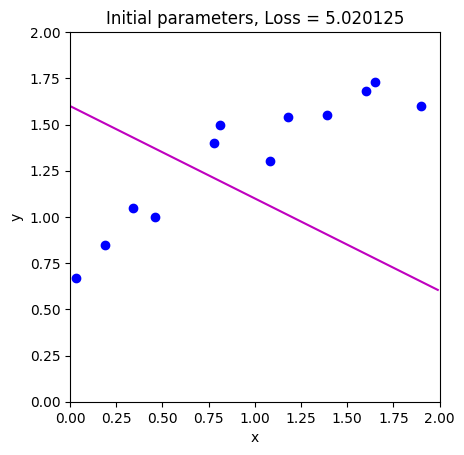

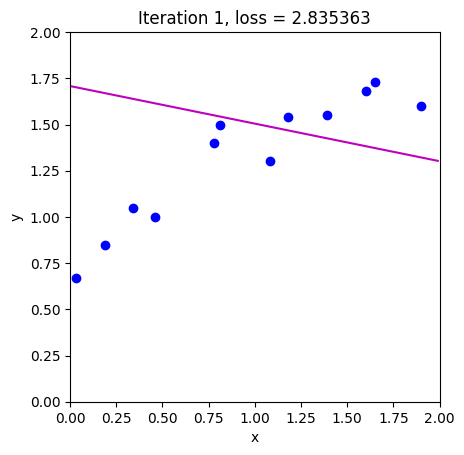

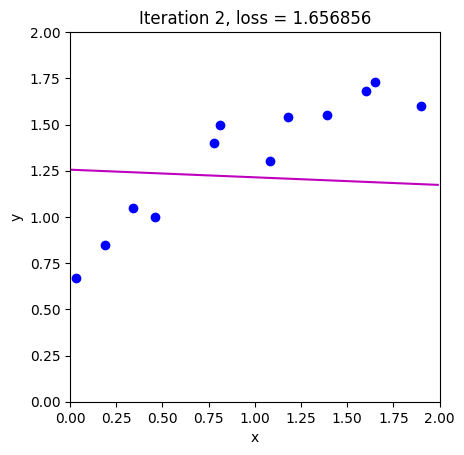

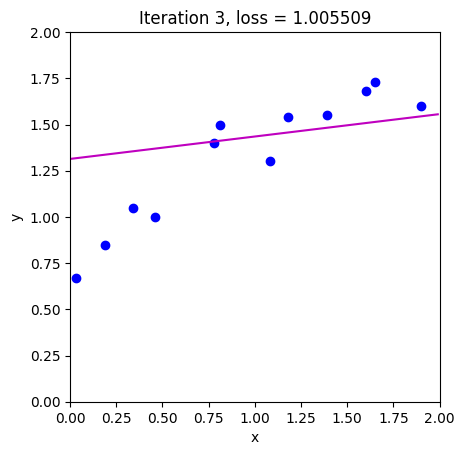

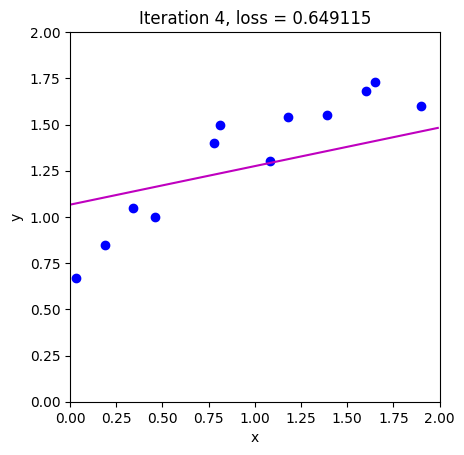

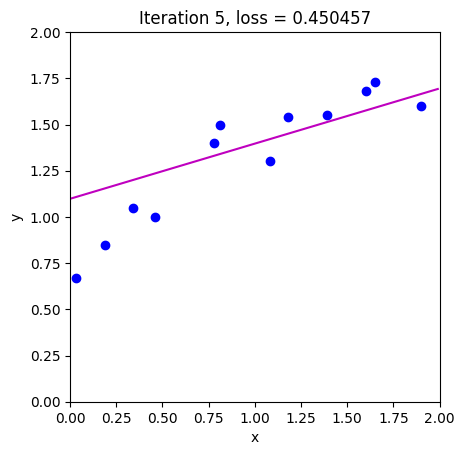

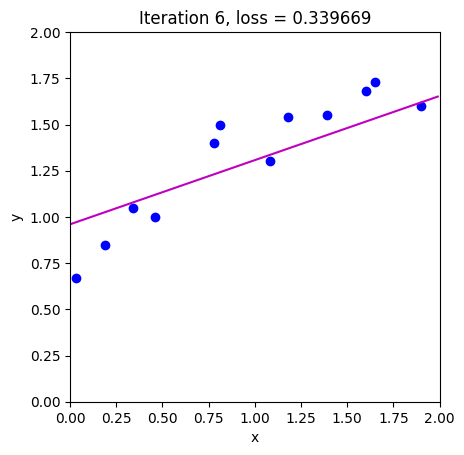

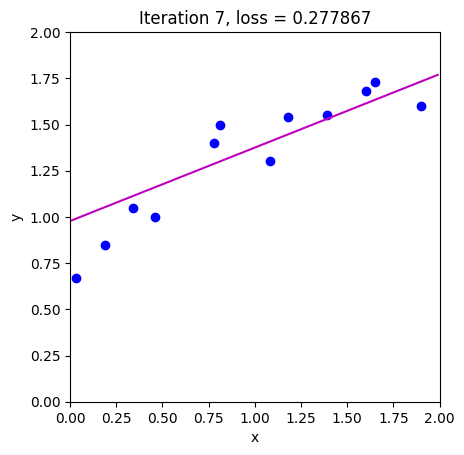

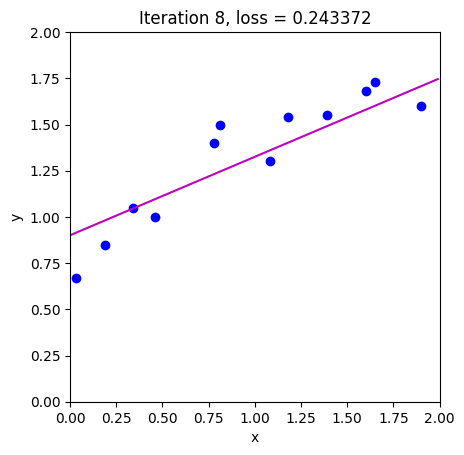

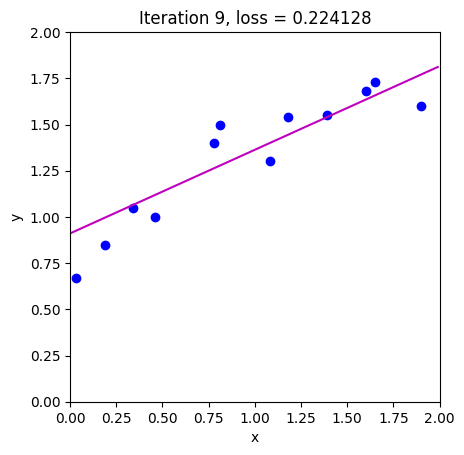

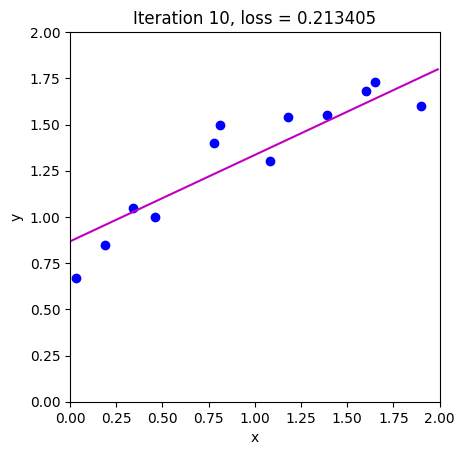

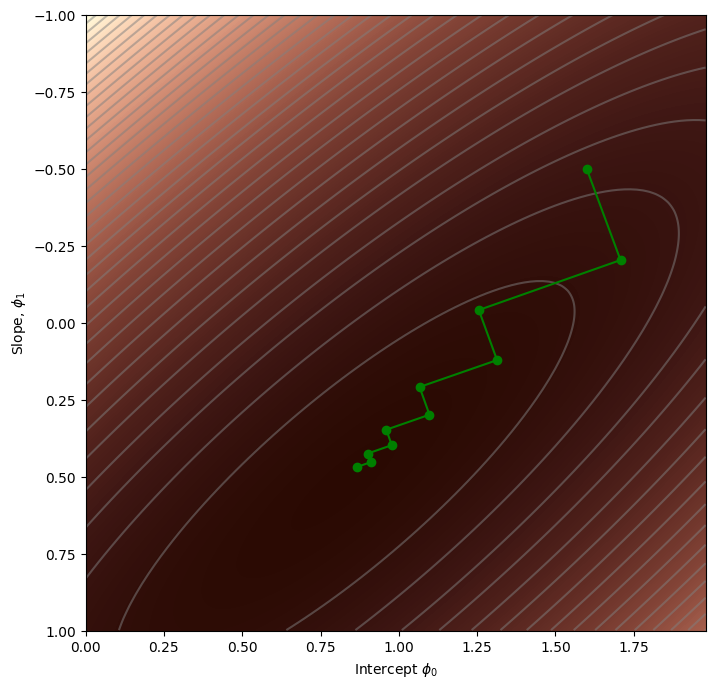

In [65]:
# Initialize the parameters and draw the model
n_steps = 10
phi_all = np.zeros((2,n_steps+1))
phi_all[0,0] = 1.6
phi_all[1,0] = -0.5

# Measure loss and draw initial model
loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,0:1])
draw_model(data,model,phi_all[:,0:1], "Initial parameters, Loss = %f"%(loss))

# Repeatedly take gradient descent steps
for c_step in range (n_steps):
  # Do gradient descent step
  phi_all[:,c_step+1:c_step+2] = gradient_descent_step(phi_all[:,c_step:c_step+1],data, model)
  # Measure loss and draw model
  loss =  compute_loss(data[0,:], data[1,:], model, phi_all[:,c_step+1:c_step+2])
  draw_model(data,model,phi_all[:,c_step+1], "Iteration %d, loss = %f"%(c_step+1,loss))

# Draw the trajectory on the loss function
draw_loss_function(compute_loss, data, model,phi_all)


## If your answer to previous task is correct then last 2 graphs would look like this

<center>

![Google Drive Image](https://drive.google.com/uc?export=view&id=138OYWUkt--8_L5xEHQeOIZ7s1AgxJxGx)


</center>


<center>

![Google Drive Image](https://drive.google.com/uc?export=view&id=1wIvZPUEmO-sNEPjtxYeO7q01WbiB02rw)


</center>
